In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

x = pickle.load(open("x.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

x = np.array(x/255.0)
y = np.array(y)

dense_layers = [10]
layer_sizes = [10]
conv_layers = [10]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = f"{conv_layer}-conv-{layer_size}-nodes-{dense_layer}-dense-{int(time.time())}"
            tensorboard = TensorBoard(log_dir=f"logs\\{NAME}")
            print(NAME)

            model = Sequential()
            
            model.add(Conv2D(32, (3,3), activation='relu', input_shape = x.shape[1:])) #then Act or Pool
            model.add(MaxPool2D(pool_size=(2,2)))
            model.add(Conv2D(32, (3,3), activation='relu'))
            model.add(MaxPool2D(pool_size=(2,2)))
            model.add(Dropout(0.25))

            #for l in range(conv_layer-1):
            model.add(Conv2D(64, (3,3), activation='relu'))
            model.add(MaxPool2D(pool_size=(2,2)))
            model.add(Conv2D(64, (3,3), activation='relu'))
            model.add(MaxPool2D(pool_size=(2,2)))
            model.add(Dropout(0.25))
                
            model.add(Flatten()) #convert 3D to 1D
                
            #for l in range(dense_layer):
            model.add(Dense(256, activation='relu'))
            model.add(Dropout(0.5))
            
            model.add(Dense(1))
            model.add(Activation("sigmoid"))

            model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

            model.fit(x, y, batch_size=32, epochs=15, validation_split=0.3, callbacks=[tensorboard])
            
            model.save(f"last-DC.model")


10-conv-10-nodes-10-dense-1594970227
Train on 17462 samples, validate on 7484 samples
Epoch 1/15
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.6703 - accuracy: 0.5809 - val_loss: 0.6525 - val_accuracy: 0.6130
Epoch 2/15
17462/17462 [==============================] - 21s 1ms/sample - loss: 0.5895 - accuracy: 0.6904 - val_loss: 0.5077 - val_accuracy: 0.7519
Epoch 3/15
17462/17462 [==============================] - 21s 1ms/sample - loss: 0.4923 - accuracy: 0.7623 - val_loss: 0.4726 - val_accuracy: 0.7909
Epoch 4/15
17462/17462 [==============================] - 21s 1ms/sample - loss: 0.4231 - accuracy: 0.8069 - val_loss: 0.3731 - val_accuracy: 0.8354
Epoch 5/15
17462/17462 [==============================] - 21s 1ms/sample - loss: 0.3829 - accuracy: 0.8268 - val_loss: 0.3794 - val_accuracy: 0.8272
Epoch 6/15
17462/17462 [==============================] - 21s 1ms/sample - loss: 0.3486 - accuracy: 0.8465 - val_loss: 0.3637 - val_accuracy: 0.8352
Epoch 7/15
17462/174

In [12]:
%reload_ext tensorboard

In [13]:
%tensorboard --logdir logs/ #http://localhost:6006/

Reusing TensorBoard on port 6006 (pid 1712), started 12:26:09 ago. (Use '!kill 1712' to kill it.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

In [2]:
CATEGORIES = ["Dog", "Cat"]

def prepare(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath ,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1).astype(float)

model = tf.keras.models.load_model("last-DC.model")

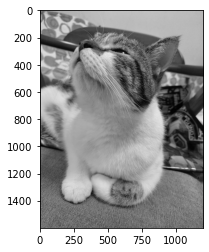

In [4]:
img_array = cv2.imread('C:/Users/s2007/Document/py/ML/Keras/Cat.jpeg' ,cv2.IMREAD_GRAYSCALE)  # convert to array
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!

In [3]:
prediction = model.predict([prepare('C:/Users/s2007/Document/py/ML/Keras/Cat.jpeg')])
print( CATEGORIES[int(prediction[0][0])] )

Cat
